# Exercices for the Montreal Metro Incidents Dataset

## Instructions

- Complete as needed this notebook in order to be able to answer the various questions.
- Submit on moodle your notebook as well as the PDF copy of your notebook (with answers computed)
- Please submit a clean notebook (i.e. only the code needed to obtain the answers and not including all debugging / trials you did)

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

## Data

In [2]:
df = pd.read_csv("Metro.csv")

In [3]:
df.head()


,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,2:56,3:32,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,2:56,3:42,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,3:35,4:41,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,4:56,5:36,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,5:25,5:54,02 min et moins,...,0,0,0,#,2019,Jan-19,1,1,2,2019-01-01


### Data cleaning

In [4]:
# Insert below operations that are required to clean the dataset

# Examples (to be completed as needed)

# Remove columns that will not be used
df = df.drop('Numéro de tournée', axis=1)
df = df.drop("Numero d'incident", axis=1)
df = df.drop("Incident en minutes", axis=1)
df = df.drop("Évacuation", axis=1)
df = df.drop("Urgence métro", axis=1)
df = df.drop("Année civile/mois", axis=1)
df = df.drop("Jour calendaire", axis=1)

# Remove incidents which are of type metro station (to keep only incidents which affected the metro service)
df = df.drop(df[df["Type d'incident"] == 'S'].index)

In [5]:
# Insert below operations that you want to perform to transform data 
# A transformation that will be needed is to create a dataFrame which contains incidents labeled uniquely according a single line (refer to what we did in the lecture)


## Questions

### 1. Which are the main primary and second causes for interruptions?

In this question we want to know what are the major primary and secondary causes for interruptions in the metro service.<br>
The primary causes can be found in the field `Cause primaire` and the secondary causes in the field `Cause secondaire`.

- Use the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method on the `Cause primaire`, respectively `Cause secondaire` to aggregate the data according the causes.
- Apply the [`count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html) method to count them
- To find the cause responsible for most incidents the dataframe method [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html) can be used.
- Alternatively you can sort the values with the method [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
- To create a pie chart use the [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) method form [`MatPlotLib`](https://matplotlib.org/stable/index.html)
- Percentage values can be added to the pie chart using the `autopct` option (for example `autopct='%1.0f%%'`)

Notes:
1. You may want to use Google translate to understand what is the actual highest primary/secondary cause in case you dont speak French.
2. The cryptic code `MR-73` refers to the old train constellation of the STM and the code `MPM10` is the new train constellation

In [6]:
# What is the most frequent primary cause ('Cause primaire') for incidents?
df2=df.groupby("Cause primaire").count()

In [7]:
df2

,Type d'incident,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
Cause primaire,,,,,,,,,,,,,,,,,,
#N/D,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Autres,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057
Clientèle,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349
Exploitation trains,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524
Matériel roulant,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660
Équipements fixes,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203


In [8]:
# What is the most frequent secondary cause ('Cause secondaire') for incidents?
df3=df.groupby("Cause secondaire").count()

In [9]:
df3

,Type d'incident,Cause primaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
Cause secondaire,,,,,,,,,,,,,,,,,,
#N/D,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Blessée ou malade,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531
Causes externes,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394
Centre de contrôle,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
Contrats MPM10,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
Contrats Réno-Stations,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
Contrats Réno-Système,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Ligne 1, 2, 4, 5",1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
MPM-10,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771


In [10]:
# Create a pie chart for the primary causes for the year 2019
primarycause =df[(df["Année civile"] == 2019)]
pcause = primarycause.groupby("Cause primaire").count()['Symptome']
pcause


Cause primaire
#N/D                      2
Autres                  300
Clientèle              2512
Exploitation trains     667
Matériel roulant        956
Équipements fixes       644
Name: Symptome, dtype: int64

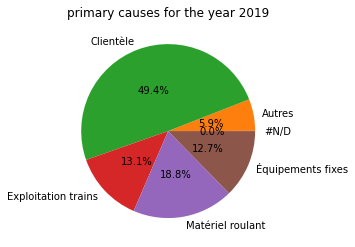

In [11]:
plt.pie(pcause, labels=pcause.index,autopct='%1.1f%%',pctdistance=0.5)
plt.title("primary causes for the year 2019")
plt.show()

![Hand scetch of answer](img/Q1.png "Hand scetch of answer")

In [12]:
# Create a pie chart for the primary causes for the year 2021
primarycause21 =df[(df["Année civile"] == 2021)]
pcause21 = primarycause21.groupby("Cause primaire").count()['Symptome']
pcause21

Cause primaire
#N/D                      2
Autres                  287
Clientèle              1907
Exploitation trains     268
Matériel roulant        515
Équipements fixes       585
Name: Symptome, dtype: int64

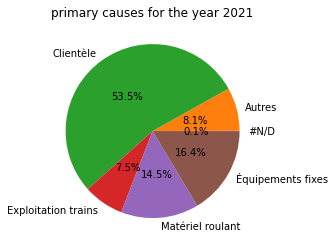

In [13]:
plt.pie(pcause21, labels=pcause21.index,autopct='%1.1f%%',pctdistance=0.5)
plt.title("primary causes for the year 2021")
plt.show()

In [14]:
# Bonus question (optional)
# Create bar-plot charts which shows in decreasing order the primary, respectively secondary, causes for service interruptions

@interact(cause=widgets.Dropdown(options=['Cause primaire', 'Cause secondaire'],
                                description='Cause'))
def causes_for_interruptions(cause):
    """
    Number of incidents due to various causes
    """

interactive(children=(Dropdown(description='Cause', options=('Cause primaire', 'Cause secondaire'), value='Cau…

### 2. Which metro stations are the most often a source of incidents ?

The field `Code de lieu` contains the name of the metro station that was the source of the incident.<br>
You may find some "strange" metro station names (e.g. `B124`). For the purpose of this exercise we consider these entries as errors and they should ideally be removed during the cleaning phase. (You may wish to remove at least some of them to show the idea).

How does compare the metro station 'Guy-Concordia' to this ?

**Possible method:**
- Use the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to list for each metro line the number of incidents per metro stations
- For each of the lines, extract the station with the highest number of incidents The dataframe method [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html) can be used for this task.

**For advanced programmers (optional):**

Observe how the metro stations are reported. You will see that some contain more than one station (as more than one station where the source of the incident).
For example you will find "Atwater/Guy-Concordia" which shows that here two stations were involved.

Try to take this into account by creating two incidents : one for `Atwater` and one for `Guy-Concordia`.<br>
To automate this, you can search for entries containing the character `/` and then split the string into two strings (left and right from '/')<br>
You can however ignore this effect and do the exercise assuming that "Atwater/Guy-Concordia" is another "valid" metro station without loosing any mark.

In [15]:
cnt= df[df["Ligne"]=="Ligne bleue"].groupby("Code de lieu").count()

In [16]:
cnt

,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
Code de lieu,,,,,,,,,,,,,,,,,,
5999,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
5N31,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
5N57,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
5R45,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Acadie,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Acadie/Parc,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Côte-des-Neiges,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Côte-des-Neiges/Université de Montréal,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
De Castelnau,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67


In [17]:
# Station with the most incidents on the yellow line
yellow = df[df["Ligne"]=="Ligne jaune"].groupby("Code de lieu").count()['Symptome']
yellow


Code de lieu
4999                        13
4N49                        21
4N55                        19
4R54                         3
Berri-UQAM                 435
Berri-UQAM/Jean-Drapeau     27
Bonsecours PR                4
Ile Notre-Dame PR            7
Jean-Drapeau                99
Jean-Drapeau/Longueuil      18
Longueuil                  390
Name: Symptome, dtype: int64

In [18]:
yellow.idxmax()

'Berri-UQAM'

In [19]:
# Station with the most incidents on the blue line
blue = df[df["Ligne"]=="Ligne bleue"].groupby("Code de lieu").count()['Symptome']
blue

Code de lieu
5999                                         21
5N31                                         67
5N57                                         39
5R45                                         14
Acadie                                       47
Acadie/Parc                                  10
Côte-des-Neiges                             100
Côte-des-Neiges/Université de Montréal        6
De Castelnau                                 67
De Castelnau/Jean-Talon                       4
Decelles PR                                   4
Edouard Montpetit                            67
Edouard Montpetit/Outremont                   8
Fabre                                        75
Fabre/Iberville                               3
Iberville                                    64
Iberville/St-Michel                          11
Jean-Talon                                  109
Jean-Talon/Fabre                             14
Outremont                                    91
Outremont/Acadie           

In [20]:
blue.idxmax()

'Snowdon'

In [21]:
# Station with the most incidents on the orange line
orange=df[df["Ligne"]=="Ligne orange"].groupby("Code de lieu").count()['Symptome']
orange

Code de lieu
2999                    33
2F81                     1
2G89                    43
2N21                   105
2N85                     8
                      ... 
Vendôme                139
Vendôme/St-Henri        18
Viger PR                 4
Villa-Maria            105
Villa-Maria/Vendôme     14
Name: Symptome, Length: 86, dtype: int64

In [22]:
orange.idxmax()

'Côte-Vertu'

In [23]:
# Station with the most incidents on the green line
green=df[df["Ligne"]=="Ligne verte"].groupby("Code de lieu").count()['Symptome']
green

Code de lieu
1999                      51
1N17                      77
1N71                      79
1P63                      15
1R53                       6
                        ... 
Verdun/De l'Eglise         6
Versailles PR             16
Viau                     153
Viau/L'Assomption         11
l'Assomption/Cadillac      7
Name: Symptome, Length: 74, dtype: int64

In [24]:
green.idxmax()

'Berri-UQAM'

### 3. Events due to the use of emergency break by users

The field `KFS` reports if the interruption was due to the usage of an emergency break (`KFS == 1`).

Provide two graphs to analyze this situation:
- A first graph for the green line: report for a given year, the total number of incidents in each month due to the usage of the emergency break
- A second graph: extend the previous graph to report not only the green line, but all four lines (i.e. a graph for a given year which shows, for each month, the total number of incidents due to to emergency break usage for each metro line)

In [25]:
# Graph 1
# Graph (bar chart) with total number of incidents due to emergency break usage in each month for a given year on the green line
# Note: the green line is 'Ligne verte'
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def number_monthly_KFS_green_line_year(year):
    """
    Number of incidents due to emergency break usage on each month for a given year of the ornage line
    """

    inc = df[(df["Année civile"] == year)].groupby(["Ligne", "Mois calendrier", "KFS"]).count()
    inc
    inc = inc.groupby(["Ligne", "Mois calendrier"]).mean()
    months = np.sort(df["Mois calendrier"].unique())
    width = np.min(np.diff(months))/10
    days = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12']
    verte = inc.loc[('Ligne verte', slice(None)), :]['Symptome']
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.bar(months + 1*width, verte, color='tab:green', label='Ligne verte', )
    plt.ylabel("Number of daily incidents")
    plt.title("Average number of daily incidents in "+ str(year) + " due to emergency break ")
    plt.xticks(ticks=months, labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

In [26]:
# Graph 2
# Graph (bar chart) showing in a given year, for each month the total number of incidents due to emergency break usage per metro line
# Each metro line should be represented by its color on the graph
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def number_monthly_KFS_year(year):
    """
    Number of incidents due to emergency break usage on each month and metro line for a given year
    """
    # Add here your code
    inc = df[(df["Année civile"] == year)].groupby(["Ligne", "Mois calendrier", "KFS"]).count()
    inc
    inc = inc.groupby(["Ligne", "Mois calendrier"]).mean()
    months = np.sort(df["Mois calendrier"].unique())
    width = np.min(np.diff(months))/5
    days = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12']
    jaune = inc.loc[('Ligne jaune', slice(None)), :]['Symptome']
    bleue = inc.loc[('Ligne bleue', slice(None)), :]['Symptome']
    orange = inc.loc[('Ligne orange', slice(None)), :]['Symptome']
    verte = inc.loc[('Ligne verte', slice(None)), :]['Symptome']
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.bar(months - 2*width, jaune, width, color='#FFD700', label='Ligne jaune', align='edge')
    ax.bar(months - 1*width, bleue, width, color='tab:blue', label='Ligne bleue', align='edge')
    ax.bar(months + 0*width, orange, width, color='tab:orange', label='Ligne orange', align='edge')
    ax.bar(months + 1*width, verte, width, color='tab:green', label='Ligne verte', align='edge')

    plt.ylabel("Number of daily incidents")
    plt.title("Average number of daily incidents in "+ str(year) + " due to emergency break ")
    plt.xticks(ticks=months, labels=days, rotation=45,  ha='center')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

### 4. How many incidents are due to vandalism ?

These events can be found in the field `'Cause secondaire'`.<br>
They are labeled as `'Méfait volontaire'`

Make your analysis based on 
- metro line
- years
- total and average number of incidents

First create the two requested graphs below and then add one more graph you feel that would make sense 

In [37]:
# Graph (bar plot) with total number of of incidents (for a given year) due to vandalism for each metro line
# Each metro line should be represented by its color on the graph
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def total_number_of_vandalism_incidents_year(year):
    """
    Total number of vandalism incidents for each metro line for a given year
    """
    # Add here your code
    incident = df[(df["Année civile"] == year)].groupby(["Ligne", "Cause secondaire"])['MÃ©fait volontaire'].mean()
    incident = incident.groupby(["Ligne", "Cause secondaire"]).mean()

   

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

![Hand scetch of answer](img/Q4.png "Hand scetch of answer")

In [28]:
# Graph (bar plot) with average number of of incidents per year due to vandalism for each metro line
# Each metro line should be represented by its color on the graph
# Use the following function template as start point

def average_number_of_vandalism_incidents():
    """
    Average number of incidents per year due to vandalism
    """
    # Add here your code

In [29]:
# Your own graph of data representation that could be useful to understand vandalism events in Montreal metro
